<a href="https://colab.research.google.com/github/Rahul786Patidar/Pharmaceutical-Sales-prediction-/blob/main/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [ ]:
pip install pystan prophet

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly,plot_components_plotly

In [ ]:
new_data = pd.read_csv('/content/drive/MyDrive/DIGICHROME/new_data.csv')
new_data.dropna(inplace=True)
new_data.reset_index(drop =True,inplace=True)

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   Store                      1017209 non-null  int64 
 1   DayOfWeek                  1017209 non-null  int64 
 2   Date                       1017209 non-null  object
 3   Sales                      1017209 non-null  int64 
 4   Customers                  1017209 non-null  int64 
 5   Open                       1017209 non-null  int64 
 6   Promo                      1017209 non-null  int64 
 7   StateHoliday               1017209 non-null  int64 
 8   SchoolHoliday              1017209 non-null  int64 
 9   StoreType                  1017209 non-null  int64 
 10  Assortment                 1017209 non-null  int64 
 11  CompetitionDistance        1017209 non-null  int64 
 12  CompetitionOpenSinceMonth  1017209 non-null  int64 
 13  CompetitionOpenSinceYear   

In [ ]:
new_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


In [ ]:
new_data=new_data[['Date','Sales']]
new_data.head()

,Date,Sales
0,2015-07-31,5263
1,2015-07-31,6064
2,2015-07-31,8314
3,2015-07-31,13995
4,2015-07-31,4822


# Change Column Names for Prophet

In [ ]:
new_data.columns=['ds','y']

In [ ]:
new_data['ds']=pd.to_datetime(new_data['ds'])
new_data.tail()

,ds,y
1017204,2013-01-01,0
1017205,2013-01-01,0
1017206,2013-01-01,0
1017207,2013-01-01,0
1017208,2013-01-01,0


# Plot The Data

<Axes: xlabel='ds'>

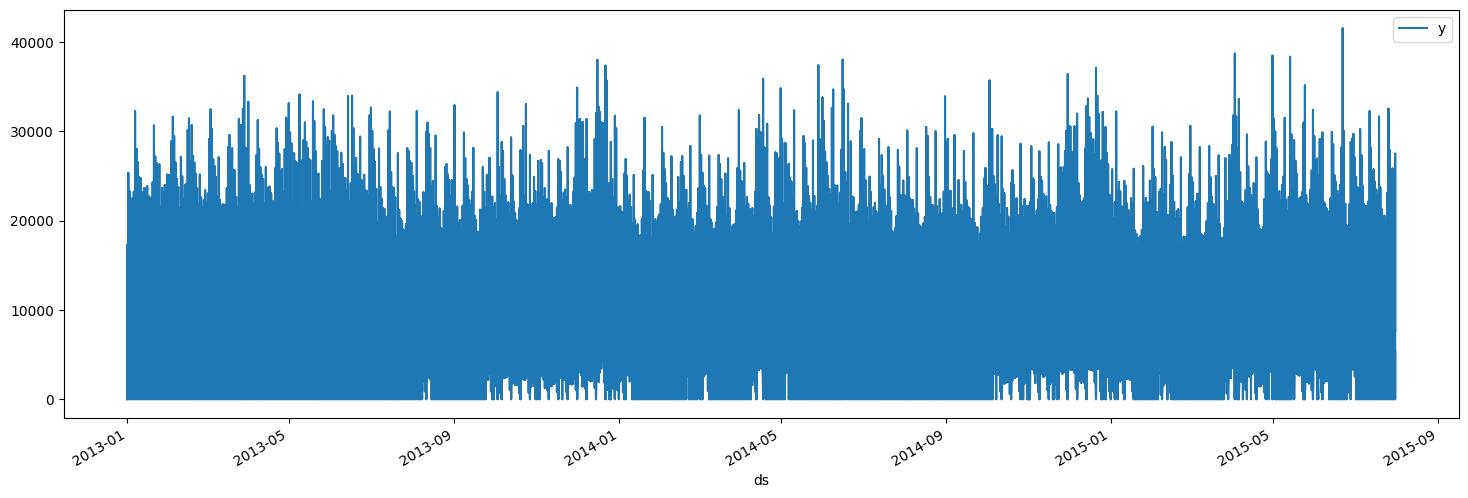

In [ ]:
new_data.plot(x='ds',y='y',figsize=(18,6))

Train, Test Split

In [ ]:
train = new_data.iloc[:len(new_data)-365]
test=new_data.iloc[len(new_data)-365]

In [ ]:
# Making Predictions
m= Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365) #m for monthly,H=hourly
forecast=m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42gyahk5/r34eysn6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42gyahk5/nmjsfg0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19483', 'data', 'file=/tmp/tmp42gyahk5/r34eysn6.json', 'init=/tmp/tmp42gyahk5/nmjsfg0l.json', 'output', 'file=/tmp/tmp42gyahk5/prophet_modela7yldooi/prophet_model-20230911121238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:12:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:19:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42gyahk5/ngezs2wa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42gyahk5/9u4wiccy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10424', 'data', 'file=/tmp/tmp42gyahk5/ngezs2wa.json', 'init=/tmp/tmp42gyahk5/9u4wiccy.json', 'output', 'file=/tmp/tmp42gyahk5/prophet_modelzuvk4eoj/prophet_model-20230911123044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


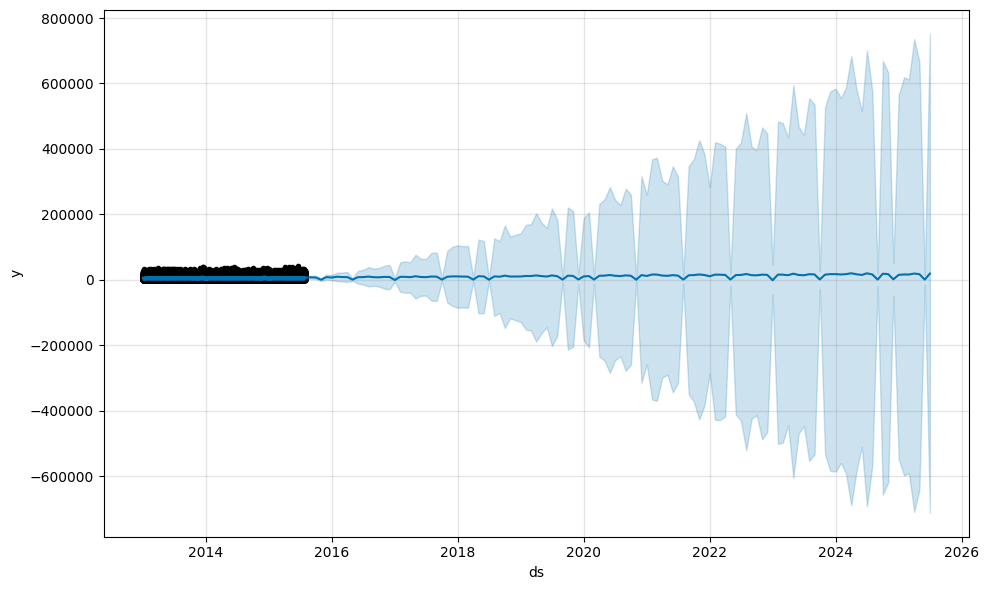

In [ ]:
m = Prophet(seasonality_mode='multiplicative').fit(new_data)
future = m.make_future_dataframe(periods=120, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)